# Análisis Exploratorio de Datos (EDA) - MovieLens Dataset

Este notebook contiene un análisis exploratorio completo del dataset MovieLens, incluyendo:
- Carga y exploración inicial de datos (movies, ratings, tags, genome)
- Análisis estadístico descriptivo
- Análisis de distribuciones de ratings
- Análisis de géneros cinematográficos
- Análisis de tags y genome tags
- Análisis de enlaces (IMDb, TMDb)
- Correlaciones y patrones
- Visualizaciones interactivas
- Insights y conclusiones

## 1. Importación de Librerías y Configuración

In [10]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Librerías importadas correctamente")
print("✓ Configuración aplicada")

✓ Librerías importadas correctamente
✓ Configuración aplicada


## 2. Carga de Datos

In [11]:
# Definir rutas de los archivos
data_path = '/home/abraham/Escritorio/PGVD/Dataset/'

# Cargar todos los archivos CSV
print("Cargando archivos del dataset MovieLens...")
print("=" * 80)

# Cargar movies
df_movies = pd.read_csv(data_path + 'movie.csv')
print(f"✓ Movies: {df_movies.shape[0]} películas, {df_movies.shape[1]} columnas")

# Cargar ratings
df_ratings = pd.read_csv(data_path + 'rating.csv')
print(f"✓ Ratings: {df_ratings.shape[0]} valoraciones, {df_ratings.shape[1]} columnas")

# Cargar tags
df_tags = pd.read_csv(data_path + 'tag.csv')
print(f"✓ Tags: {df_tags.shape[0]} etiquetas, {df_tags.shape[1]} columnas")

# Cargar genome tags
df_genome_tags = pd.read_csv(data_path + 'genome_tags.csv')
print(f"✓ Genome Tags: {df_genome_tags.shape[0]} tags del genoma, {df_genome_tags.shape[1]} columnas")

# Cargar genome scores
df_genome_scores = pd.read_csv(data_path + 'genome_scores.csv')
print(f"✓ Genome Scores: {df_genome_scores.shape[0]} puntuaciones del genoma, {df_genome_scores.shape[1]} columnas")

# Cargar links
df_links = pd.read_csv(data_path + 'link.csv')
print(f"✓ Links: {df_links.shape[0]} enlaces, {df_links.shape[1]} columnas")

print("=" * 80)
print("✓ Todos los archivos cargados exitosamente")

Cargando archivos del dataset MovieLens...
✓ Movies: 27278 películas, 3 columnas
✓ Ratings: 20000263 valoraciones, 4 columnas
✓ Ratings: 20000263 valoraciones, 4 columnas
✓ Tags: 465564 etiquetas, 4 columnas
✓ Genome Tags: 1128 tags del genoma, 2 columnas
✓ Tags: 465564 etiquetas, 4 columnas
✓ Genome Tags: 1128 tags del genoma, 2 columnas
✓ Genome Scores: 11709768 puntuaciones del genoma, 3 columnas
✓ Links: 27278 enlaces, 3 columnas
✓ Todos los archivos cargados exitosamente
✓ Genome Scores: 11709768 puntuaciones del genoma, 3 columnas
✓ Links: 27278 enlaces, 3 columnas
✓ Todos los archivos cargados exitosamente


## 3. Exploración Inicial de Datos

### 3.1 Dataset de Películas (Movies)

In [12]:
print("=" * 80)
print("DATASET DE PELÍCULAS")
print("=" * 80)
print(f"\nDimensiones: {df_movies.shape[0]} películas x {df_movies.shape[1]} columnas")
print(f"\nColumnas: {list(df_movies.columns)}")
print("\nPrimeras 10 películas:")
print(df_movies.head(10))
print("\n" + "=" * 80)
print("Información del DataFrame:")
df_movies.info()

DATASET DE PELÍCULAS

Dimensiones: 27278 películas x 3 columnas

Columnas: ['movieId', 'title', 'genres']

Primeras 10 películas:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        

In [13]:
# Análisis de valores nulos en movies
print("=" * 80)
print("VALORES NULOS - MOVIES")
print("=" * 80)
null_movies = df_movies.isnull().sum()
null_pct_movies = (null_movies / len(df_movies)) * 100
print(pd.DataFrame({
    'Valores Nulos': null_movies,
    'Porcentaje (%)': null_pct_movies
}))

# Verificar duplicados
duplicates_movies = df_movies.duplicated().sum()
print(f"\nFilas duplicadas: {duplicates_movies}")

VALORES NULOS - MOVIES
         Valores Nulos  Porcentaje (%)
movieId              0            0.00
title                0            0.00
genres               0            0.00

Filas duplicadas: 0


In [14]:
# Extraer año de las películas
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')
df_movies['year'] = pd.to_numeric(df_movies['year'], errors='coerce')

# Limpiar título (sin año)
df_movies['title_clean'] = df_movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

print("✓ Año extraído del título")
print(f"\nRango de años: {df_movies['year'].min():.0f} - {df_movies['year'].max():.0f}")
print(f"\nPelículas sin año identificado: {df_movies['year'].isna().sum()}")
print("\nEjemplos:")
print(df_movies[['title', 'title_clean', 'year']].head(10))

✓ Año extraído del título

Rango de años: 1891 - 2015

Películas sin año identificado: 22

Ejemplos:
                                title                  title_clean    year
0                    Toy Story (1995)                    Toy Story 1995.00
1                      Jumanji (1995)                      Jumanji 1995.00
2             Grumpier Old Men (1995)             Grumpier Old Men 1995.00
3            Waiting to Exhale (1995)            Waiting to Exhale 1995.00
4  Father of the Bride Part II (1995)  Father of the Bride Part II 1995.00
5                         Heat (1995)                         Heat 1995.00
6                      Sabrina (1995)                      Sabrina 1995.00
7                 Tom and Huck (1995)                 Tom and Huck 1995.00
8                 Sudden Death (1995)                 Sudden Death 1995.00
9                    GoldenEye (1995)                    GoldenEye 1995.00


### 3.2 Dataset de Ratings (Valoraciones)

In [15]:
print("=" * 80)
print("DATASET DE RATINGS")
print("=" * 80)
print(f"\nDimensiones: {df_ratings.shape[0]} valoraciones x {df_ratings.shape[1]} columnas")
print(f"\nColumnas: {list(df_ratings.columns)}")
print("\nPrimeras 10 valoraciones:")
print(df_ratings.head(10))
print("\n" + "=" * 80)
print("Información del DataFrame:")
df_ratings.info()

# Análisis de valores nulos
print("\n" + "=" * 80)
print("VALORES NULOS - RATINGS")
print("=" * 80)
null_ratings = df_ratings.isnull().sum()
null_pct_ratings = (null_ratings / len(df_ratings)) * 100
print(pd.DataFrame({
    'Valores Nulos': null_ratings,
    'Porcentaje (%)': null_pct_ratings
}))

DATASET DE RATINGS

Dimensiones: 20000263 valoraciones x 4 columnas

Columnas: ['userId', 'movieId', 'rating', 'timestamp']

Primeras 10 valoraciones:
   userId  movieId  rating            timestamp
0       1        2    3.50  2005-04-02 23:53:47
1       1       29    3.50  2005-04-02 23:31:16
2       1       32    3.50  2005-04-02 23:33:39
3       1       47    3.50  2005-04-02 23:32:07
4       1       50    3.50  2005-04-02 23:29:40
5       1      112    3.50  2004-09-10 03:09:00
6       1      151    4.00  2004-09-10 03:08:54
7       1      223    4.00  2005-04-02 23:46:13
8       1      253    4.00  2005-04-02 23:35:40
9       1      260    4.00  2005-04-02 23:33:46

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), objec

In [16]:
# Convertir timestamp a datetime
# Los timestamps ya vienen en formato string datetime, no necesitan unit='s'
df_ratings['timestamp_dt'] = pd.to_datetime(df_ratings['timestamp'])
df_ratings['year'] = df_ratings['timestamp_dt'].dt.year
df_ratings['month'] = df_ratings['timestamp_dt'].dt.month
df_ratings['day_of_week'] = df_ratings['timestamp_dt'].dt.dayofweek

print("✓ Timestamp convertido a datetime")
print(f"\nRango de fechas de ratings:")
print(f"  Fecha mínima: {df_ratings['timestamp_dt'].min()}")
print(f"  Fecha máxima: {df_ratings['timestamp_dt'].max()}")
print(f"\nEstadísticas de ratings:")
print(df_ratings['rating'].describe())

✓ Timestamp convertido a datetime

Rango de fechas de ratings:
  Fecha mínima: 1995-01-09 11:46:44
  Fecha máxima: 2015-03-31 06:40:02

Estadísticas de ratings:
count   20000263.00
mean           3.53
std            1.05
min            0.50
25%            3.00
50%            3.50
75%            4.00
max            5.00
Name: rating, dtype: float64
count   20000263.00
mean           3.53
std            1.05
min            0.50
25%            3.00
50%            3.50
75%            4.00
max            5.00
Name: rating, dtype: float64


### 3.3 Dataset de Tags (Etiquetas)

In [17]:
print("=" * 80)
print("DATASET DE TAGS")
print("=" * 80)
print(f"\nDimensiones: {df_tags.shape[0]} tags x {df_tags.shape[1]} columnas")
print(f"\nColumnas: {list(df_tags.columns)}")
print("\nPrimeros 10 tags:")
print(df_tags.head(10))

# Análisis de valores nulos
print("\n" + "=" * 80)
print("VALORES NULOS - TAGS")
print("=" * 80)
null_tags = df_tags.isnull().sum()
null_pct_tags = (null_tags / len(df_tags)) * 100
print(pd.DataFrame({
    'Valores Nulos': null_tags,
    'Porcentaje (%)': null_pct_tags
}))

# Convertir timestamp
df_tags['timestamp_dt'] = pd.to_datetime(df_tags['timestamp'])
print(f"\n✓ Timestamp convertido a datetime")
print(f"\nTags únicos: {df_tags['tag'].nunique()}")
print(f"Usuarios que han puesto tags: {df_tags['userId'].nunique()}")
print(f"Películas con tags: {df_tags['movieId'].nunique()}")

DATASET DE TAGS

Dimensiones: 465564 tags x 4 columnas

Columnas: ['userId', 'movieId', 'tag', 'timestamp']

Primeros 10 tags:
   userId  movieId               tag            timestamp
0      18     4141       Mark Waters  2009-04-24 18:19:40
1      65      208         dark hero  2013-05-10 01:41:18
2      65      353         dark hero  2013-05-10 01:41:19
3      65      521     noir thriller  2013-05-10 01:39:43
4      65      592         dark hero  2013-05-10 01:41:18
5      65      668         bollywood  2013-05-10 01:37:56
6      65      898  screwball comedy  2013-05-10 01:42:40
7      65     1248     noir thriller  2013-05-10 01:39:43
8      65     1391              mars  2013-05-10 01:40:55
9      65     1617          neo-noir  2013-05-10 01:43:37

VALORES NULOS - TAGS
           Valores Nulos  Porcentaje (%)
userId                 0            0.00
movieId                0            0.00
tag                   16            0.00
timestamp              0            0.00

✓ Times

### 3.4 Dataset de Links (IMDb y TMDb)

In [18]:
print("=" * 80)
print("DATASET DE LINKS")
print("=" * 80)
print(f"\nDimensiones: {df_links.shape[0]} enlaces x {df_links.shape[1]} columnas")
print(f"\nColumnas: {list(df_links.columns)}")
print("\nPrimeros 10 enlaces:")
print(df_links.head(10))

# Análisis de valores nulos
print("\n" + "=" * 80)
print("VALORES NULOS - LINKS")
print("=" * 80)
null_links = df_links.isnull().sum()
null_pct_links = (null_links / len(df_links)) * 100
print(pd.DataFrame({
    'Valores Nulos': null_links,
    'Porcentaje (%)': null_pct_links
}))

print(f"\nPelículas con enlace IMDb: {df_links['imdbId'].notna().sum()}")
print(f"Películas con enlace TMDb: {df_links['tmdbId'].notna().sum()}")

DATASET DE LINKS

Dimensiones: 27278 enlaces x 3 columnas

Columnas: ['movieId', 'imdbId', 'tmdbId']

Primeros 10 enlaces:
   movieId  imdbId   tmdbId
0        1  114709   862.00
1        2  113497  8844.00
2        3  113228 15602.00
3        4  114885 31357.00
4        5  113041 11862.00
5        6  113277   949.00
6        7  114319 11860.00
7        8  112302 45325.00
8        9  114576  9091.00
9       10  113189   710.00

VALORES NULOS - LINKS
         Valores Nulos  Porcentaje (%)
movieId              0            0.00
imdbId               0            0.00
tmdbId             252            0.92

Películas con enlace IMDb: 27278
Películas con enlace TMDb: 27026


### 3.5 Dataset de Genome Tags y Scores

In [19]:
print("=" * 80)
print("DATASET DE GENOME TAGS")
print("=" * 80)
print(f"\nDimensiones: {df_genome_tags.shape[0]} genome tags x {df_genome_tags.shape[1]} columnas")
print(f"\nColumnas: {list(df_genome_tags.columns)}")
print("\nPrimeros 15 genome tags:")
print(df_genome_tags.head(15))

print("\n" + "=" * 80)
print("DATASET DE GENOME SCORES")
print("=" * 80)
print(f"\nDimensiones: {df_genome_scores.shape[0]} genome scores x {df_genome_scores.shape[1]} columnas")
print(f"\nColumnas: {list(df_genome_scores.columns)}")
print("\nPrimeros 10 genome scores:")
print(df_genome_scores.head(10))
print(f"\nEstadísticas de relevance:")
print(df_genome_scores['relevance'].describe())

DATASET DE GENOME TAGS

Dimensiones: 1128 genome tags x 2 columnas

Columnas: ['tagId', 'tag']

Primeros 15 genome tags:
    tagId           tag
0       1           007
1       2  007 (series)
2       3  18th century
3       4         1920s
4       5         1930s
5       6         1950s
6       7         1960s
7       8         1970s
8       9         1980s
9      10  19th century
10     11            3d
11     12          70mm
12     13           80s
13     14          9/11
14     15       aardman

DATASET DE GENOME SCORES

Dimensiones: 11709768 genome scores x 3 columnas

Columnas: ['movieId', 'tagId', 'relevance']

Primeros 10 genome scores:
   movieId  tagId  relevance
0        1      1       0.03
1        1      2       0.03
2        1      3       0.06
3        1      4       0.10
4        1      5       0.15
5        1      6       0.22
6        1      7       0.07
7        1      8       0.26
8        1      9       0.26
9        1     10       0.03

Estadísticas de relevance:

## 4. Análisis Estadístico Descriptivo

### 4.1 Resumen General del Dataset

In [20]:
print("=" * 80)
print("RESUMEN GENERAL DEL DATASET MOVIELENS")
print("=" * 80)

summary_data = {
    'Dataset': ['Movies', 'Ratings', 'Tags', 'Links', 'Genome Tags', 'Genome Scores'],
    'Registros': [
        len(df_movies),
        len(df_ratings),
        len(df_tags),
        len(df_links),
        len(df_genome_tags),
        len(df_genome_scores)
    ],
    'Columnas': [
        df_movies.shape[1],
        df_ratings.shape[1],
        df_tags.shape[1],
        df_links.shape[1],
        df_genome_tags.shape[1],
        df_genome_scores.shape[1]
    ]
}

df_summary = pd.DataFrame(summary_data)
print(df_summary.to_string(index=False))

print("\n" + "=" * 80)
print("ESTADÍSTICAS CLAVE")
print("=" * 80)
print(f"Total de películas únicas: {df_movies['movieId'].nunique():,}")
print(f"Total de usuarios únicos: {df_ratings['userId'].nunique():,}")
print(f"Total de ratings: {len(df_ratings):,}")
print(f"Promedio de ratings por usuario: {len(df_ratings) / df_ratings['userId'].nunique():.2f}")
print(f"Promedio de ratings por película: {len(df_ratings) / df_ratings['movieId'].nunique():.2f}")
print(f"Rating promedio general: {df_ratings['rating'].mean():.2f}")
print(f"Total de tags únicos: {df_tags['tag'].nunique():,}")
print(f"Total de genome tags: {len(df_genome_tags):,}")

RESUMEN GENERAL DEL DATASET MOVIELENS
      Dataset  Registros  Columnas
       Movies      27278         5
      Ratings   20000263         8
         Tags     465564         5
        Links      27278         3
  Genome Tags       1128         2
Genome Scores   11709768         3

ESTADÍSTICAS CLAVE
Total de películas únicas: 27,278
Total de usuarios únicos: 138,493
Total de ratings: 20,000,263
Promedio de ratings por usuario: 144.41
Promedio de ratings por usuario: 144.41
Promedio de ratings por película: 747.84
Rating promedio general: 3.53
Total de tags únicos: 38,643
Total de genome tags: 1,128
Promedio de ratings por película: 747.84
Rating promedio general: 3.53
Total de tags únicos: 38,643
Total de genome tags: 1,128


### 4.2 Análisis de Géneros

In [21]:
# Separar géneros (vienen separados por |)
genres_split = df_movies['genres'].str.split('|', expand=True)
all_genres = []

for col in genres_split.columns:
    all_genres.extend(genres_split[col].dropna().tolist())

# Contar géneros
from collections import Counter
genre_counts = Counter(all_genres)

# Crear DataFrame de géneros
df_genre_stats = pd.DataFrame({
    'Género': list(genre_counts.keys()),
    'Cantidad': list(genre_counts.values())
}).sort_values('Cantidad', ascending=False)

print("=" * 80)
print("DISTRIBUCIÓN DE GÉNEROS")
print("=" * 80)
print(df_genre_stats.to_string(index=False))

print(f"\n✓ Total de géneros únicos: {len(genre_counts)}")
print(f"✓ Películas con múltiples géneros: {(df_movies['genres'].str.contains('\|')).sum()}")

# Top 10 géneros
print("\n" + "=" * 80)
print("TOP 10 GÉNEROS MÁS COMUNES")
print("=" * 80)
print(df_genre_stats.head(10).to_string(index=False))

DISTRIBUCIÓN DE GÉNEROS
            Género  Cantidad
             Drama     13344
            Comedy      8374
          Thriller      4178
           Romance      4127
            Action      3520
             Crime      2939
            Horror      2611
       Documentary      2471
         Adventure      2329
            Sci-Fi      1743
           Mystery      1514
           Fantasy      1412
               War      1194
          Children      1139
           Musical      1036
         Animation      1027
           Western       676
         Film-Noir       330
(no genres listed)       246
              IMAX       196

✓ Total de géneros únicos: 20
✓ Películas con múltiples géneros: 16449

TOP 10 GÉNEROS MÁS COMUNES
     Género  Cantidad
      Drama     13344
     Comedy      8374
   Thriller      4178
    Romance      4127
     Action      3520
      Crime      2939
     Horror      2611
Documentary      2471
  Adventure      2329
     Sci-Fi      1743


## 5. Visualizaciones

### 5.1 Distribución de Ratings

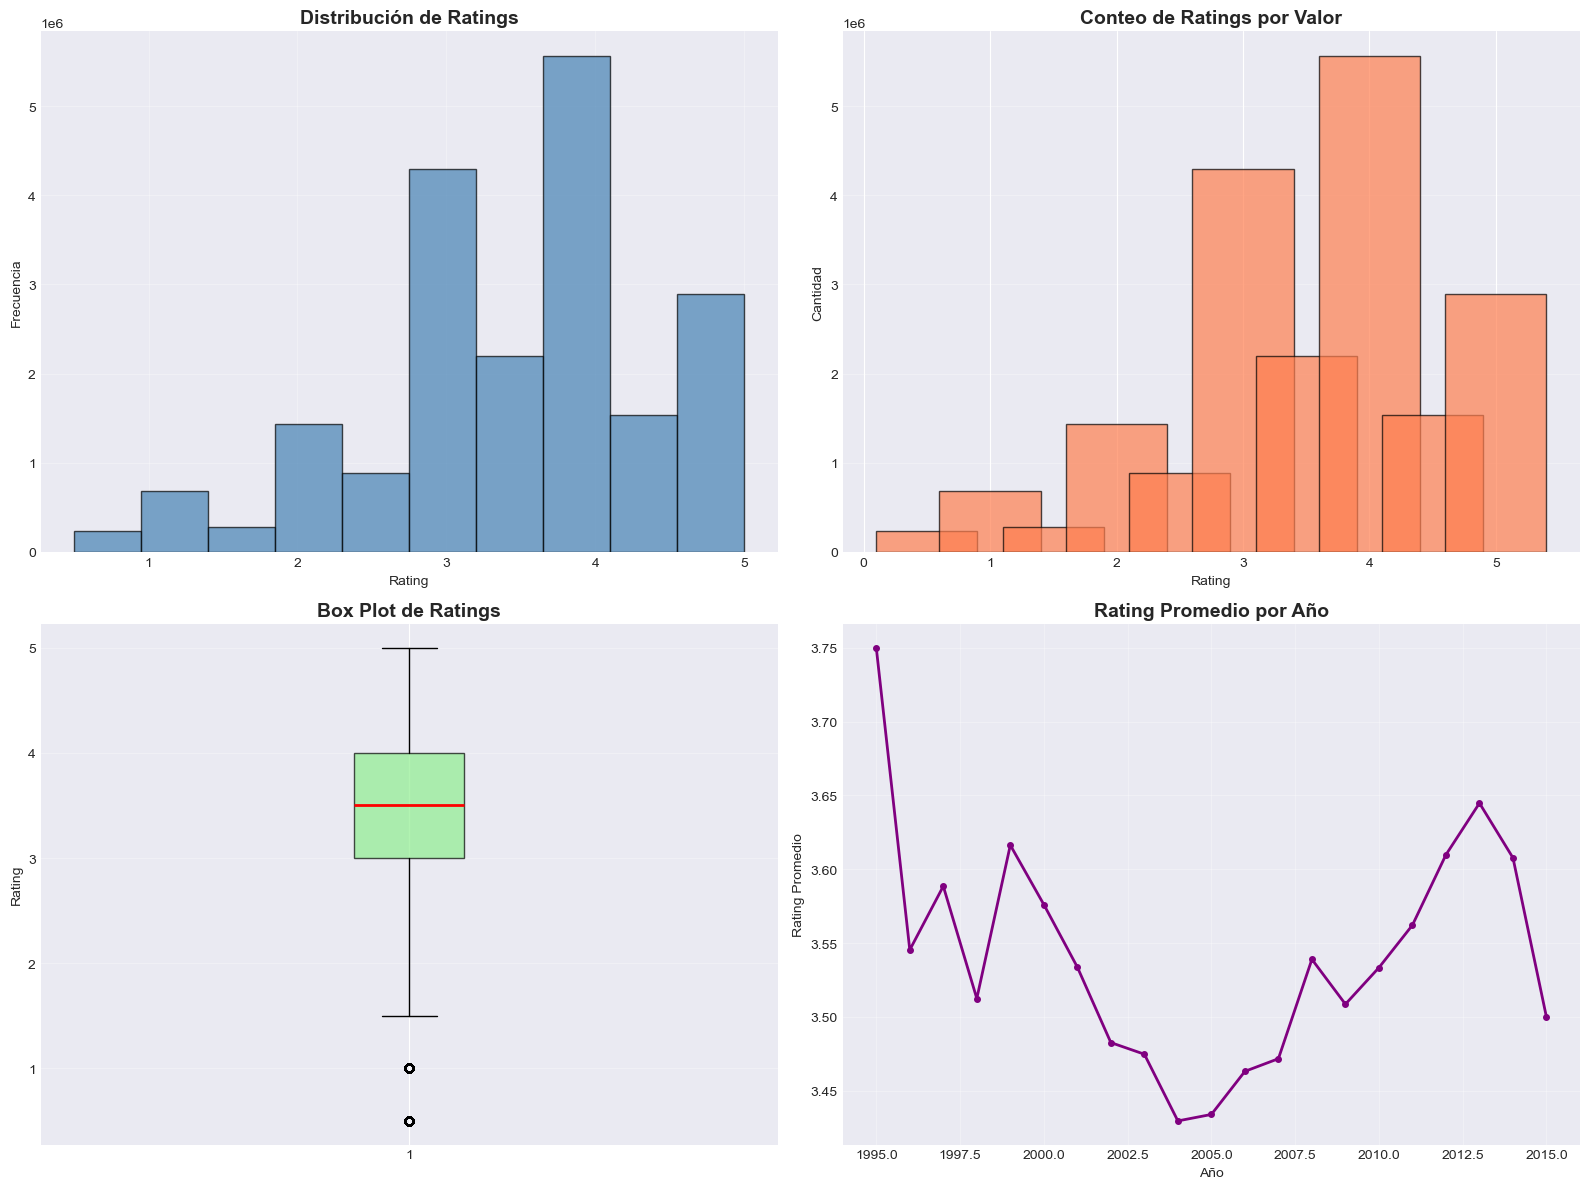


✓ Visualizaciones de distribución de ratings generadas


In [22]:
# Distribución de ratings
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de ratings
axes[0, 0].hist(df_ratings['rating'], bins=10, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Distribución de Ratings', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# Conteo de ratings por valor
rating_counts = df_ratings['rating'].value_counts().sort_index()
axes[0, 1].bar(rating_counts.index, rating_counts.values, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Conteo de Ratings por Valor', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Box plot de ratings
axes[1, 0].boxplot(df_ratings['rating'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Box Plot de Ratings', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Distribución de ratings por año
ratings_by_year = df_ratings.groupby('year')['rating'].mean()
axes[1, 1].plot(ratings_by_year.index, ratings_by_year.values, marker='o', 
                linewidth=2, markersize=4, color='purple')
axes[1, 1].set_title('Rating Promedio por Año', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('Rating Promedio')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones de distribución de ratings generadas")

### 5.2 Análisis de Géneros (Visualización)

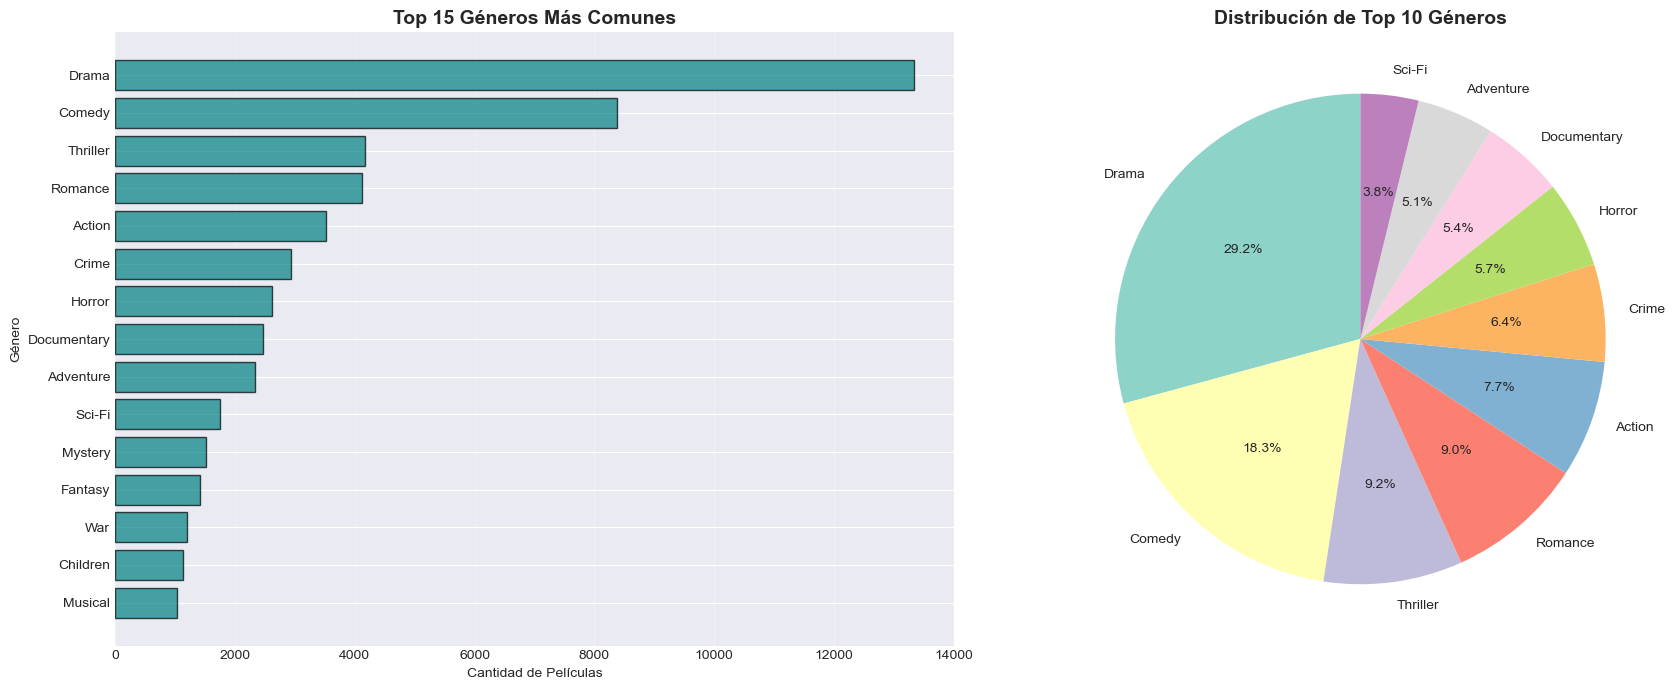


✓ Visualizaciones de géneros generadas


In [23]:
# Visualización de géneros
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 15 géneros - gráfico de barras
top_genres = df_genre_stats.head(15)
axes[0].barh(top_genres['Género'], top_genres['Cantidad'], color='teal', edgecolor='black', alpha=0.7)
axes[0].set_title('Top 15 Géneros Más Comunes', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cantidad de Películas')
axes[0].set_ylabel('Género')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Gráfico de pastel para top 10 géneros
top_10_genres = df_genre_stats.head(10)
colors = plt.cm.Set3(range(len(top_10_genres)))
axes[1].pie(top_10_genres['Cantidad'], labels=top_10_genres['Género'], 
            autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Distribución de Top 10 Géneros', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones de géneros generadas")

### 5.3 Películas por Año

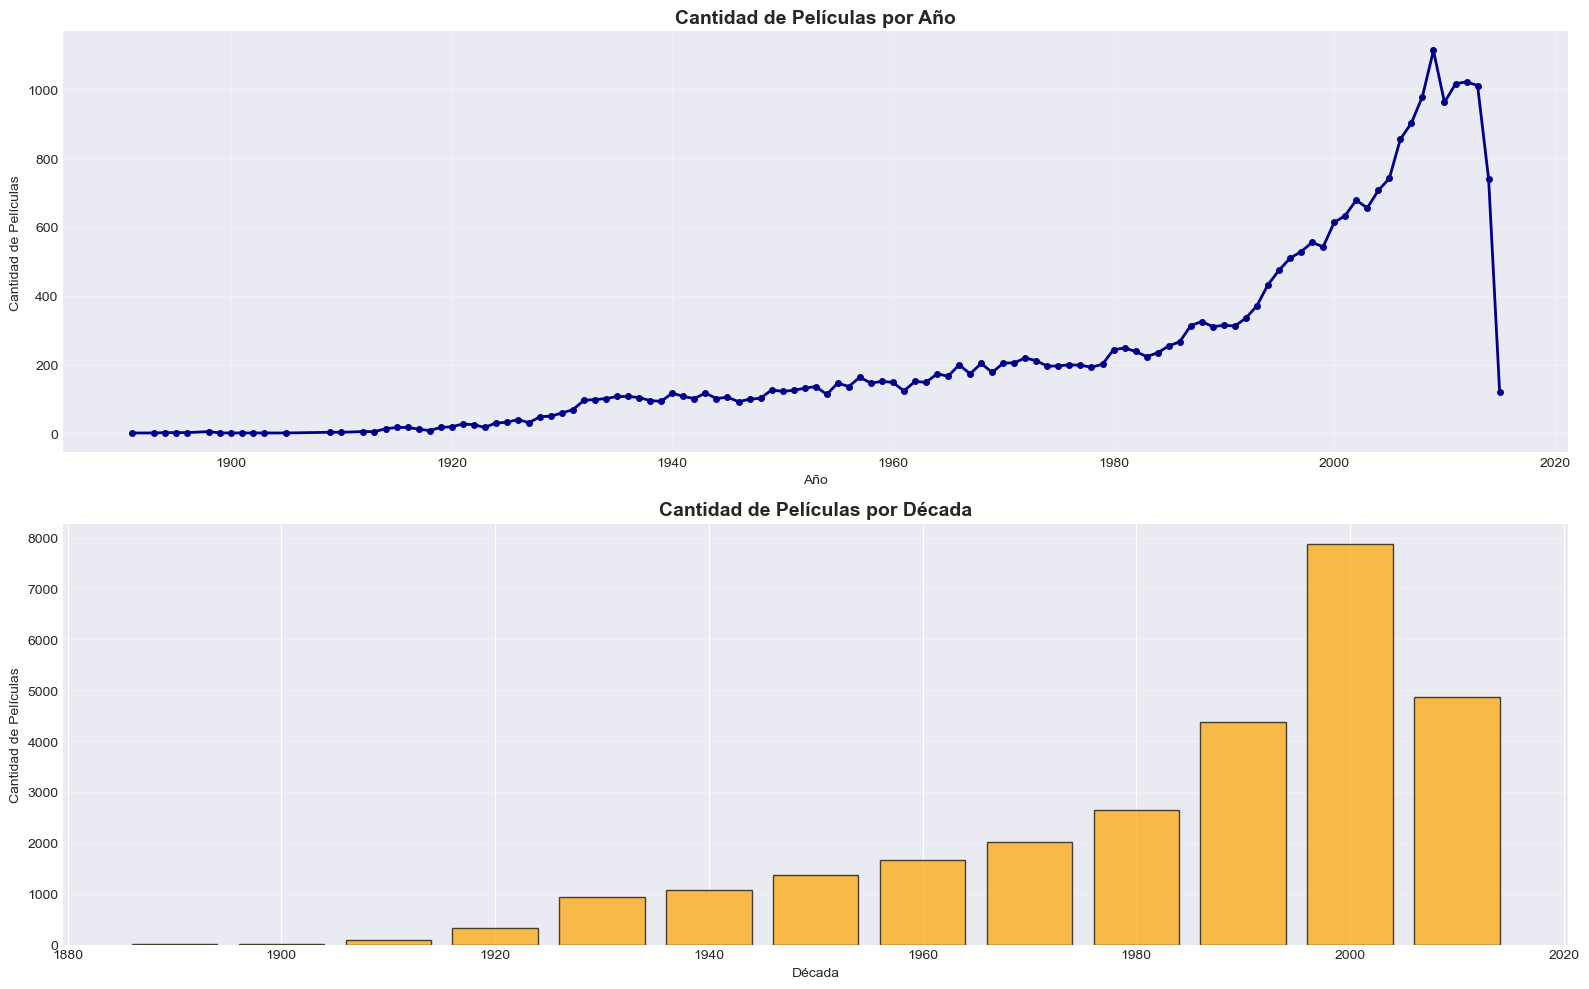


✓ Visualizaciones temporales generadas


In [24]:
# Análisis temporal de películas
movies_by_year = df_movies.groupby('year').size().reset_index(name='count')

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Películas por año - gráfico de línea
axes[0].plot(movies_by_year['year'], movies_by_year['count'], 
             marker='o', linewidth=2, markersize=4, color='darkblue')
axes[0].set_title('Cantidad de Películas por Año', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad de Películas')
axes[0].grid(True, alpha=0.3)

# Películas por década
df_movies['decade'] = (df_movies['year'] // 10) * 10
movies_by_decade = df_movies.groupby('decade').size().reset_index(name='count')
axes[1].bar(movies_by_decade['decade'], movies_by_decade['count'], 
            width=8, color='orange', edgecolor='black', alpha=0.7)
axes[1].set_title('Cantidad de Películas por Década', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Década')
axes[1].set_ylabel('Cantidad de Películas')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones temporales generadas")

### 5.4 Análisis de Actividad de Usuarios

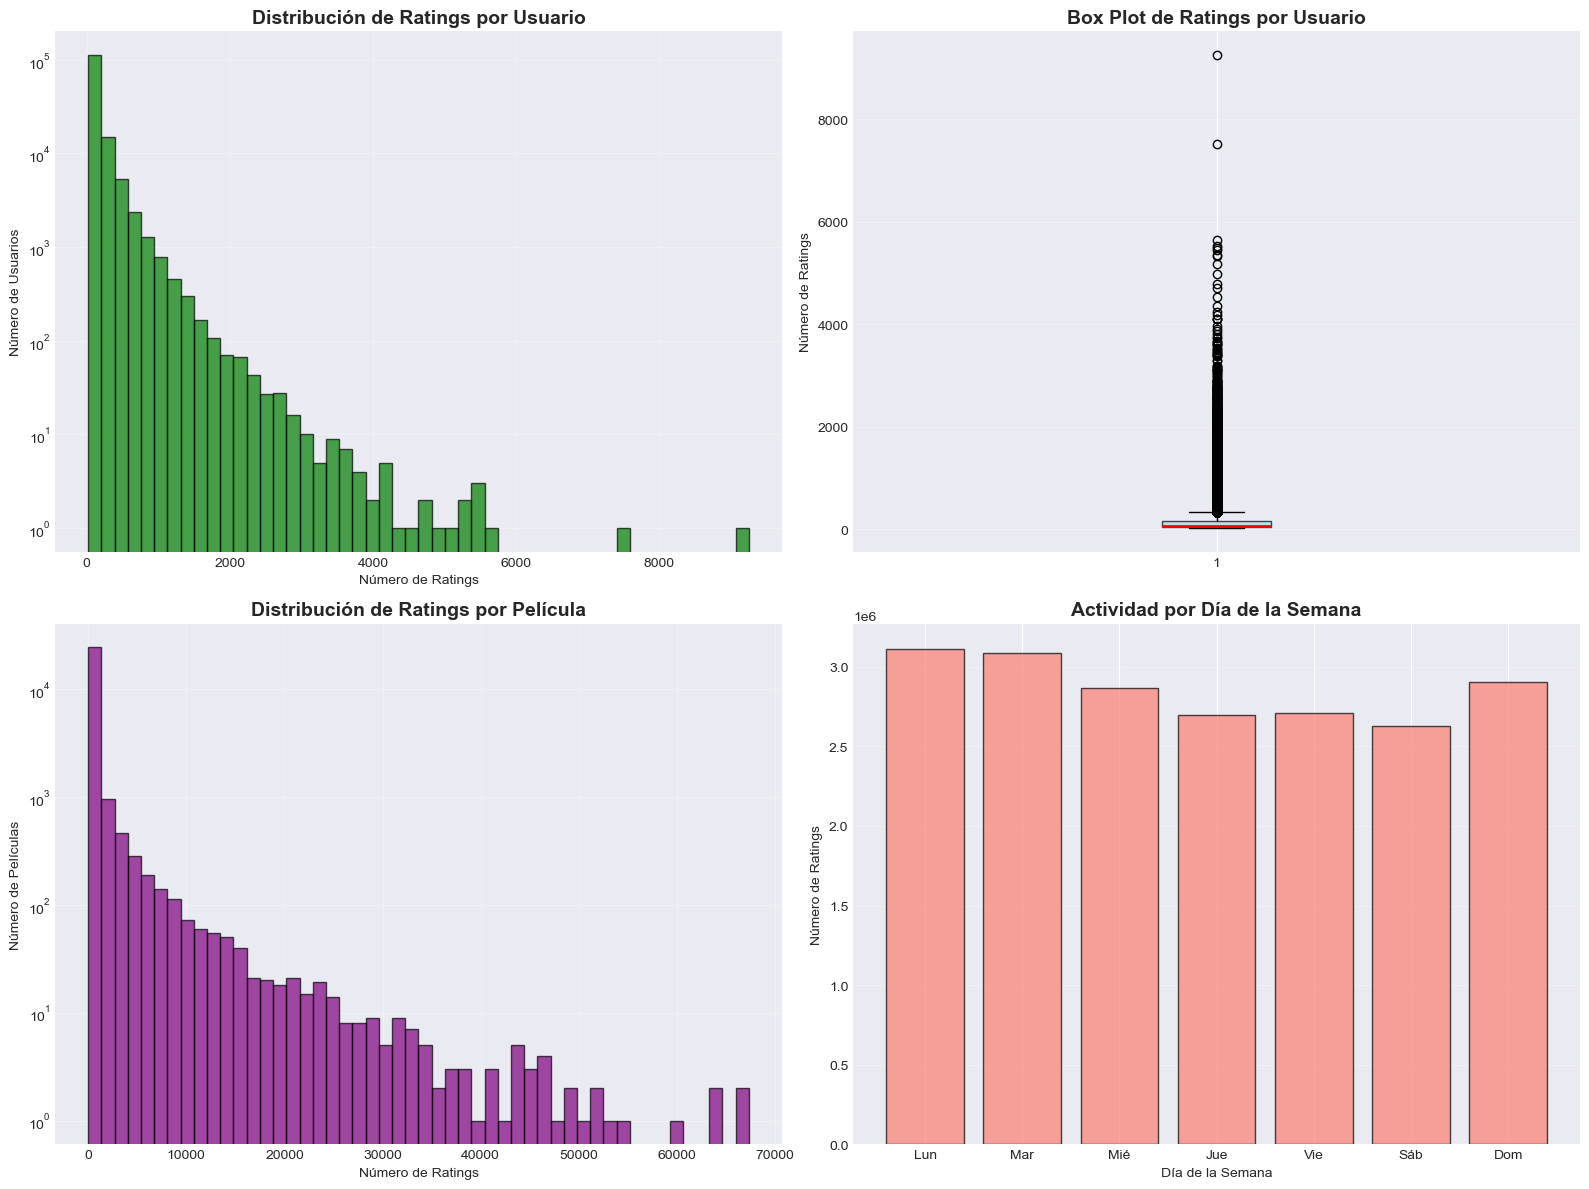


✓ Visualizaciones de actividad generadas

Usuario más activo: 9254 ratings
Película más valorada: 67310 ratings


In [25]:
# Actividad de usuarios
ratings_per_user = df_ratings.groupby('userId').size().reset_index(name='num_ratings')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de ratings por usuario
axes[0, 0].hist(ratings_per_user['num_ratings'], bins=50, edgecolor='black', 
                alpha=0.7, color='green')
axes[0, 0].set_title('Distribución de Ratings por Usuario', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Número de Ratings')
axes[0, 0].set_ylabel('Número de Usuarios')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, alpha=0.3)

# Box plot de ratings por usuario
axes[0, 1].boxplot(ratings_per_user['num_ratings'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_title('Box Plot de Ratings por Usuario', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Número de Ratings')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Ratings por película
ratings_per_movie = df_ratings.groupby('movieId').size().reset_index(name='num_ratings')
axes[1, 0].hist(ratings_per_movie['num_ratings'], bins=50, edgecolor='black', 
                alpha=0.7, color='purple')
axes[1, 0].set_title('Distribución de Ratings por Película', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Número de Ratings')
axes[1, 0].set_ylabel('Número de Películas')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Actividad por día de la semana
ratings_by_dow = df_ratings.groupby('day_of_week').size()
days = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
axes[1, 1].bar(range(7), ratings_by_dow.values, color='salmon', 
               edgecolor='black', alpha=0.7)
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(days)
axes[1, 1].set_title('Actividad por Día de la Semana', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Día de la Semana')
axes[1, 1].set_ylabel('Número de Ratings')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones de actividad generadas")
print(f"\nUsuario más activo: {ratings_per_user['num_ratings'].max()} ratings")
print(f"Película más valorada: {ratings_per_movie['num_ratings'].max()} ratings")

### 5.5 Análisis de Tags

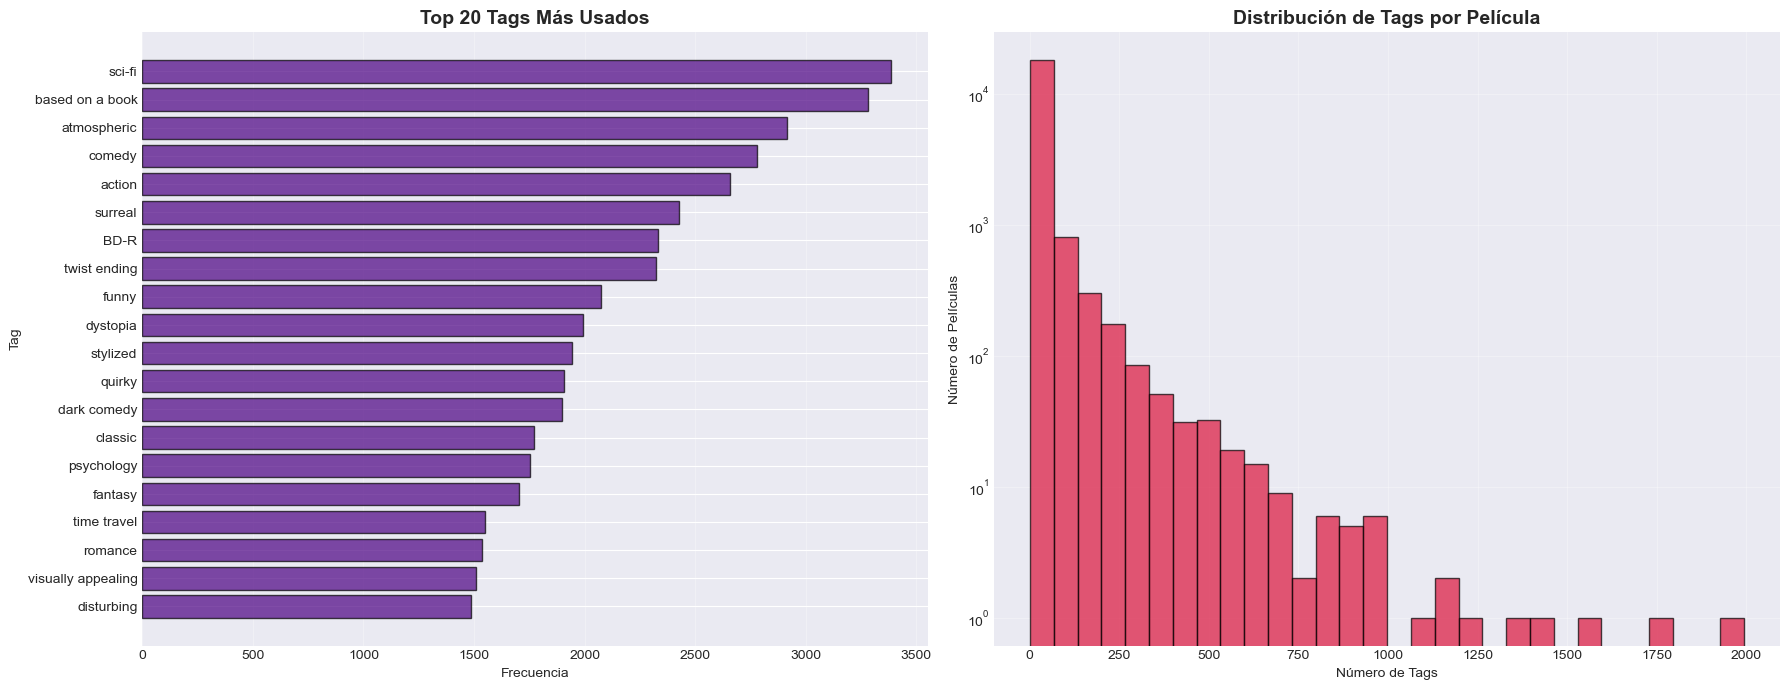


✓ Visualizaciones de tags generadas

Top 5 tags más usados:
  1. 'sci-fi': 3384 veces
  2. 'based on a book': 3281 veces
  3. 'atmospheric': 2917 veces
  4. 'comedy': 2779 veces
  5. 'action': 2657 veces


In [26]:
# Análisis de tags
top_tags = df_tags['tag'].value_counts().head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 20 tags más usados
axes[0].barh(range(len(top_tags)), top_tags.values, color='indigo', 
             edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_tags)))
axes[0].set_yticklabels(top_tags.index, fontsize=10)
axes[0].set_title('Top 20 Tags Más Usados', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('Tag')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Distribución de tags por película
tags_per_movie = df_tags.groupby('movieId').size().reset_index(name='num_tags')
axes[1].hist(tags_per_movie['num_tags'], bins=30, edgecolor='black', 
             alpha=0.7, color='crimson')
axes[1].set_title('Distribución de Tags por Película', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Tags')
axes[1].set_ylabel('Número de Películas')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones de tags generadas")
print(f"\nTop 5 tags más usados:")
for i, (tag, count) in enumerate(top_tags.head(5).items(), 1):
    print(f"  {i}. '{tag}': {count} veces")

## 6. Análisis Avanzado

### 6.1 Top 20 Películas Mejor Valoradas (con mínimo de ratings)

TOP 20 PELÍCULAS MEJOR VALORADAS (mínimo 100 ratings)
 1. Shawshank Redemption, The (1994)
    Rating promedio: 4.45 | Ratings: 63366 | Desv. Est.: 0.72
    Géneros: Crime|Drama

 2. Godfather, The (1972)
    Rating promedio: 4.36 | Ratings: 41355 | Desv. Est.: 0.84
    Géneros: Crime|Drama

 3. Usual Suspects, The (1995)
    Rating promedio: 4.33 | Ratings: 47006 | Desv. Est.: 0.76
    Géneros: Crime|Mystery|Thriller

 4. Schindler's List (1993)
    Rating promedio: 4.31 | Ratings: 50054 | Desv. Est.: 0.83
    Géneros: Drama|War

 5. Godfather: Part II, The (1974)
    Rating promedio: 4.28 | Ratings: 27398 | Desv. Est.: 0.86
    Géneros: Crime|Drama

 6. Seven Samurai (Shichinin no samurai) (1954)
    Rating promedio: 4.27 | Ratings: 11611 | Desv. Est.: 0.84
    Géneros: Action|Adventure|Drama

 7. Rear Window (1954)
    Rating promedio: 4.27 | Ratings: 17449 | Desv. Est.: 0.75
    Géneros: Mystery|Thriller

 8. Band of Brothers (2001)
    Rating promedio: 4.26 | Ratings: 4305 | Desv.

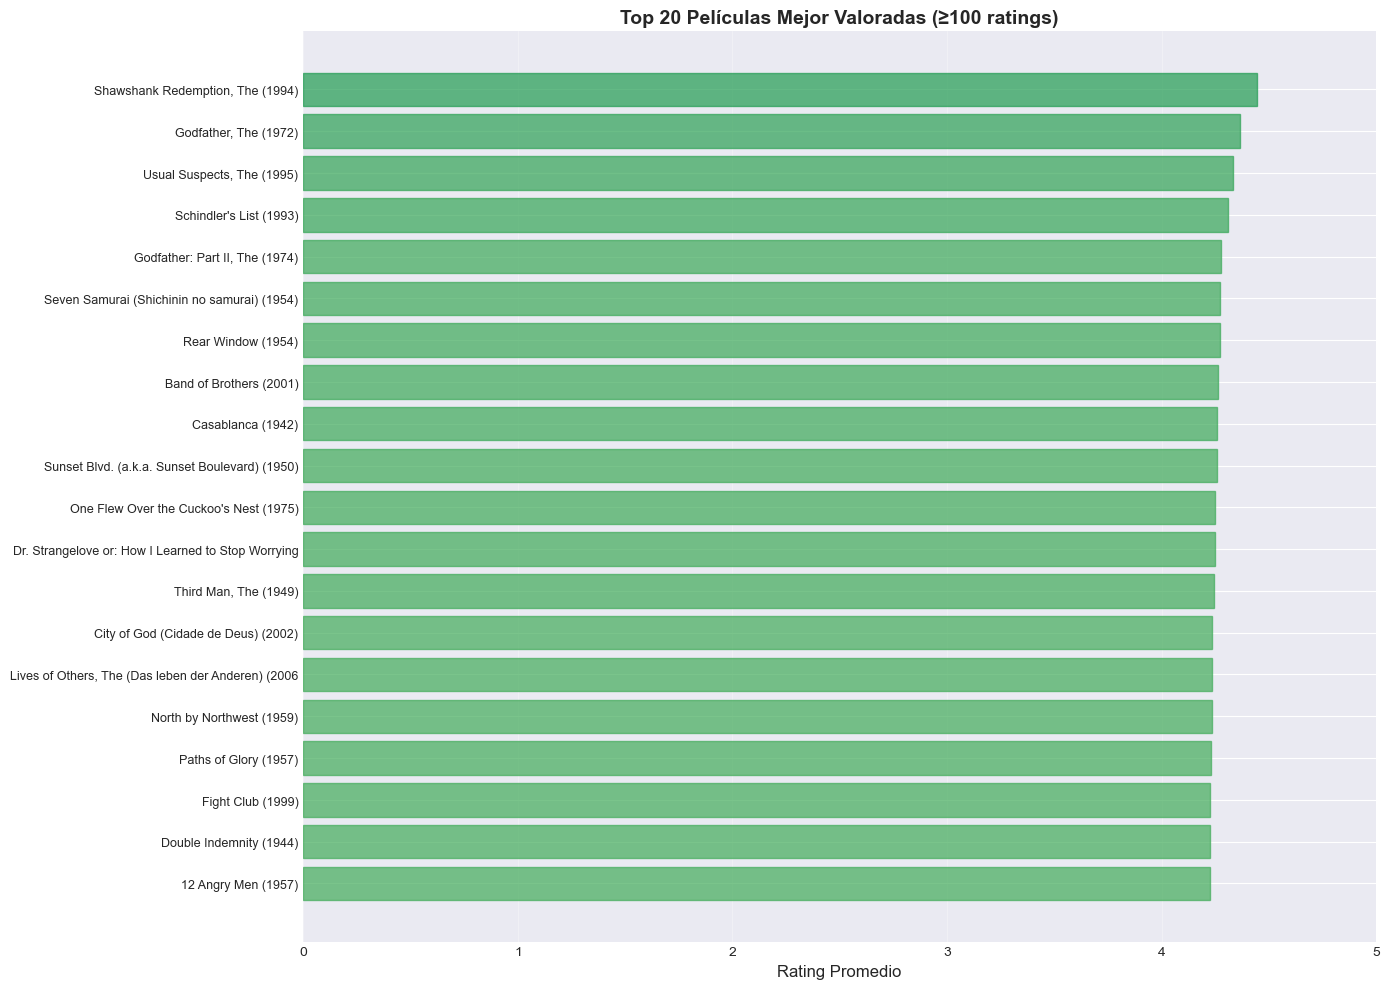

In [27]:
# Top películas mejor valoradas (con mínimo de ratings para evitar sesgos)
min_ratings = 100  # Mínimo de ratings para considerar

movie_stats = df_ratings.groupby('movieId').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings', 'std_rating']

# Filtrar películas con suficientes ratings
movie_stats_filtered = movie_stats[movie_stats['num_ratings'] >= min_ratings]

# Unir con información de películas
top_movies = movie_stats_filtered.merge(df_movies[['movieId', 'title', 'genres']], 
                                         on='movieId')
top_movies = top_movies.sort_values('avg_rating', ascending=False).head(20)

print("=" * 80)
print(f"TOP 20 PELÍCULAS MEJOR VALORADAS (mínimo {min_ratings} ratings)")
print("=" * 80)
for i, row in enumerate(top_movies.itertuples(), 1):
    print(f"{i:2d}. {row.title}")
    print(f"    Rating promedio: {row.avg_rating:.2f} | Ratings: {row.num_ratings} | "
          f"Desv. Est.: {row.std_rating:.2f}")
    print(f"    Géneros: {row.genres}")
    print()

# Visualización
fig, ax = plt.subplots(figsize=(14, 10))
y_pos = np.arange(len(top_movies))
bars = ax.barh(y_pos, top_movies['avg_rating'], color='gold', 
               edgecolor='black', alpha=0.7)

# Colorear según rating
colors = plt.cm.RdYlGn(top_movies['avg_rating'] / 5.0)
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_yticks(y_pos)
ax.set_yticklabels([title[:50] for title in top_movies['title']], fontsize=9)
ax.set_xlabel('Rating Promedio', fontsize=12)
ax.set_title(f'Top 20 Películas Mejor Valoradas (≥{min_ratings} ratings)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 5)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

### 6.2 Análisis de Ratings por Género

ESTADÍSTICAS DE RATINGS POR GÉNERO
             genre  avg_rating  num_ratings  std_rating
         Film-Noir        3.97       216689        0.90
               War        3.81      1048618        0.98
       Documentary        3.74       244619        1.00
             Crime        3.67      3298335        1.00
             Drama        3.67      8857853        0.99
           Mystery        3.66      1557282        1.00
              IMAX        3.66       492366        0.98
         Animation        3.62      1140476        1.01
           Western        3.57       423714        1.02
           Musical        3.56       870915        1.05
           Romance        3.54      3802002        1.03
          Thriller        3.51      5313506        1.03
           Fantasy        3.51      2111403        1.07
         Adventure        3.50      4380351        1.05
            Action        3.44      5614208        1.06
            Sci-Fi        3.44      3150141        1.08
            C

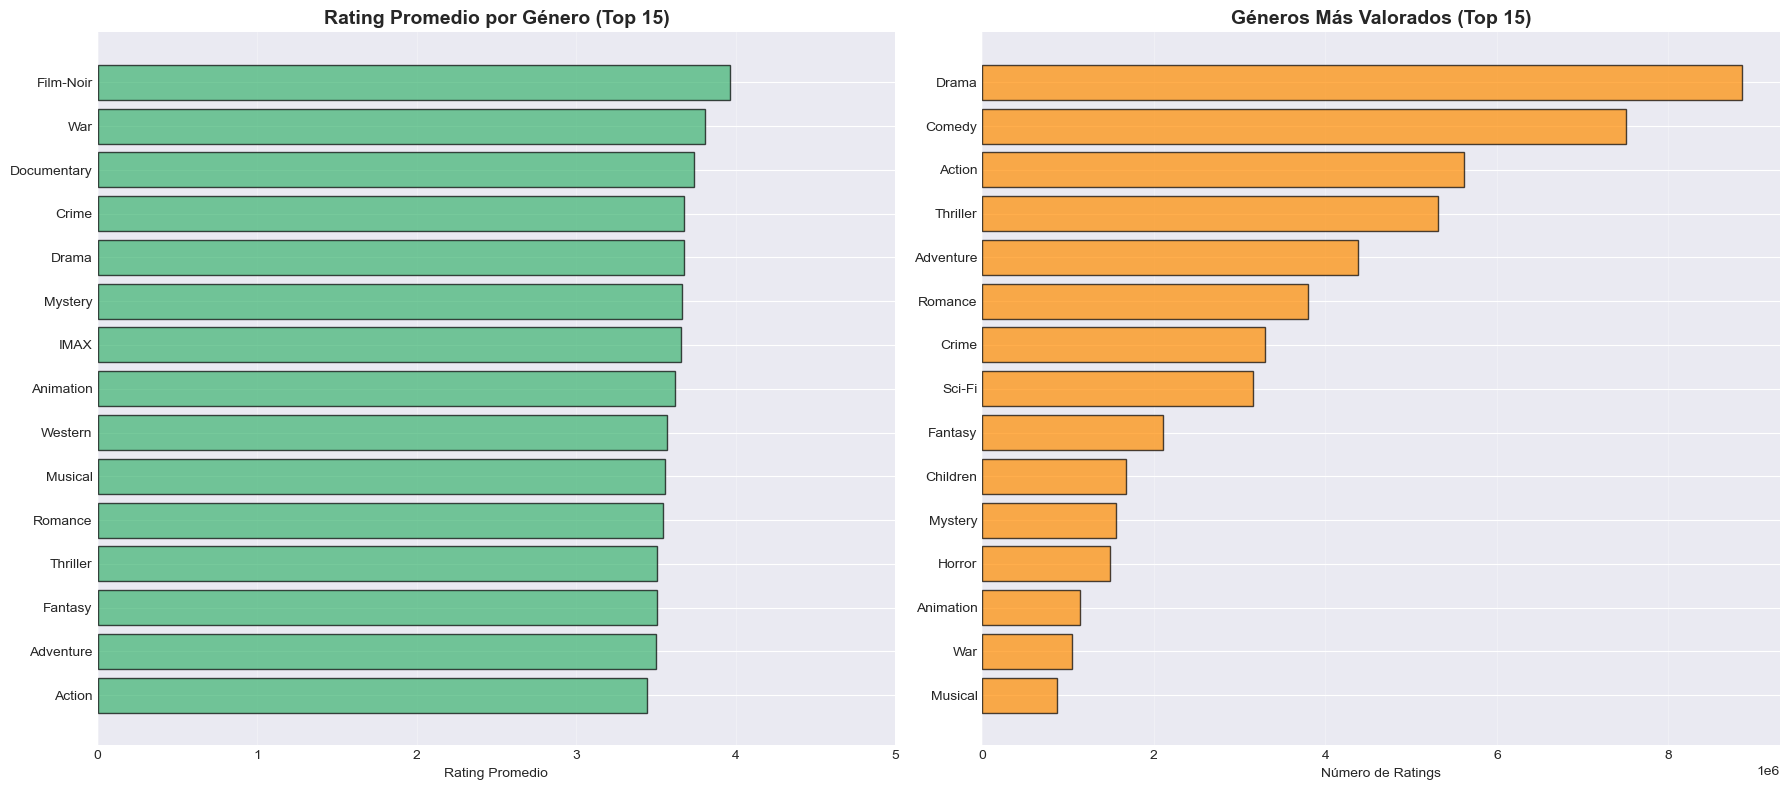


✓ Análisis de ratings por género completado


In [28]:
# Analizar ratings por género
# Expandir géneros y unir con ratings
df_movies_expanded = df_movies.copy()
df_movies_expanded['genres_list'] = df_movies_expanded['genres'].str.split('|')

# Crear DataFrame con un género por fila
genre_rows = []
for _, row in df_movies_expanded.iterrows():
    for genre in row['genres_list']:
        genre_rows.append({
            'movieId': row['movieId'],
            'genre': genre
        })

df_genre_movies = pd.DataFrame(genre_rows)

# Unir con ratings
df_ratings_genre = df_ratings.merge(df_genre_movies, on='movieId')

# Calcular estadísticas por género
genre_rating_stats = df_ratings_genre.groupby('genre').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
genre_rating_stats.columns = ['genre', 'avg_rating', 'num_ratings', 'std_rating']
genre_rating_stats = genre_rating_stats.sort_values('avg_rating', ascending=False)

print("=" * 80)
print("ESTADÍSTICAS DE RATINGS POR GÉNERO")
print("=" * 80)
print(genre_rating_stats.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Rating promedio por género
top_genres_rating = genre_rating_stats.head(15)
axes[0].barh(range(len(top_genres_rating)), top_genres_rating['avg_rating'], 
             color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_genres_rating)))
axes[0].set_yticklabels(top_genres_rating['genre'])
axes[0].set_xlabel('Rating Promedio')
axes[0].set_title('Rating Promedio por Género (Top 15)', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 5)
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Número de ratings por género
top_genres_count = genre_rating_stats.nlargest(15, 'num_ratings')
axes[1].barh(range(len(top_genres_count)), top_genres_count['num_ratings'], 
             color='darkorange', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(top_genres_count)))
axes[1].set_yticklabels(top_genres_count['genre'])
axes[1].set_xlabel('Número de Ratings')
axes[1].set_title('Géneros Más Valorados (Top 15)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✓ Análisis de ratings por género completado")

### 6.3 Matriz de Correlación (Genome Scores)

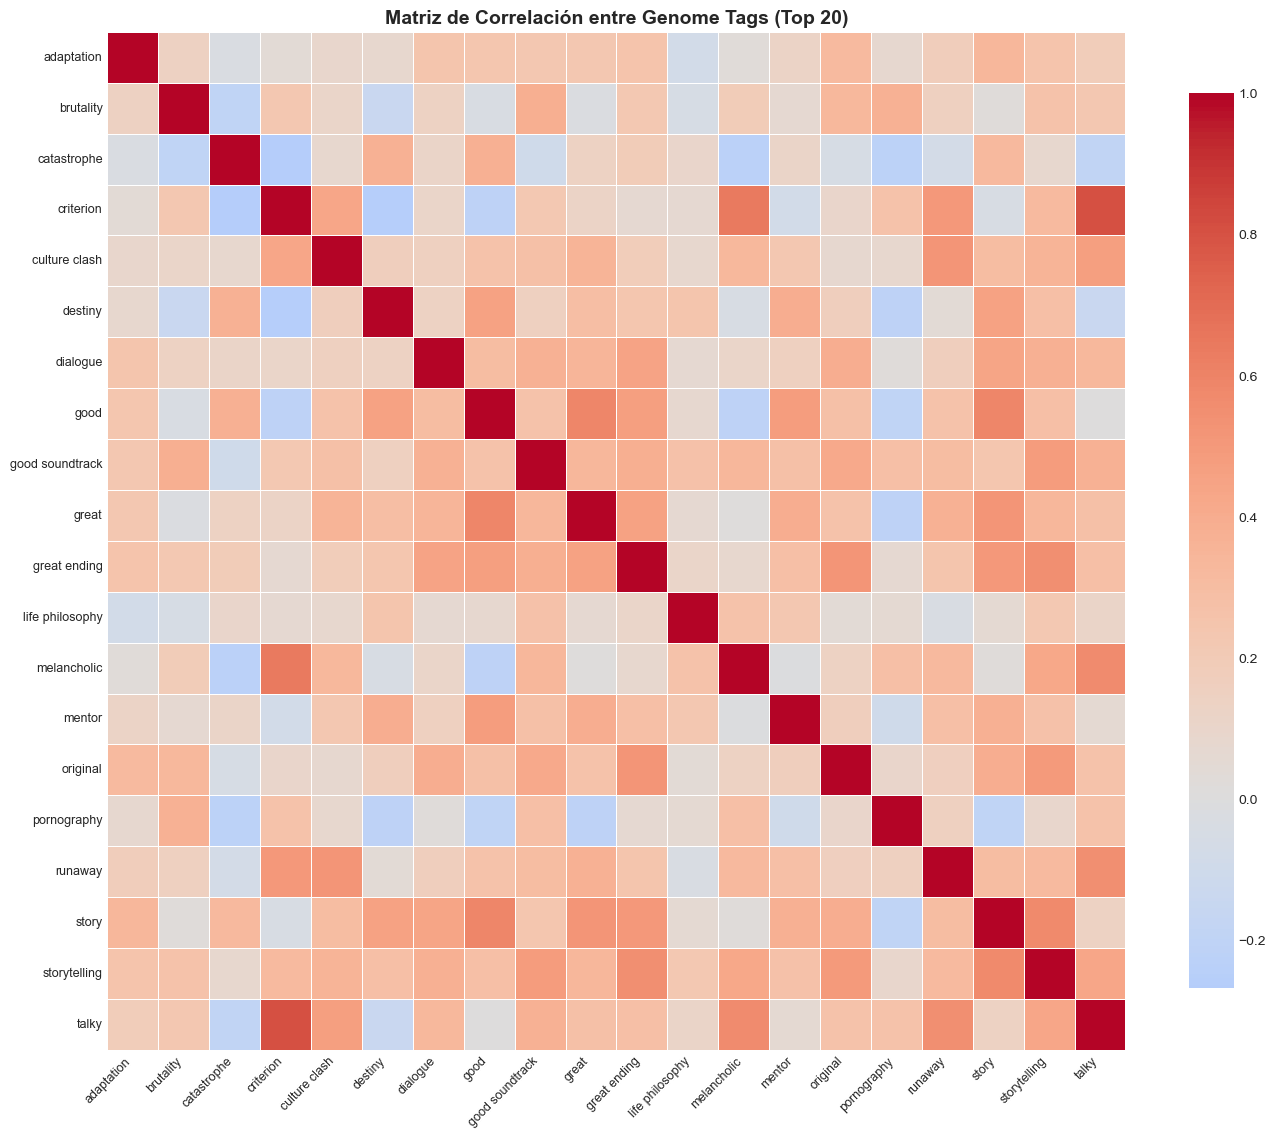


✓ Matriz de correlación de genome tags generada

Dimensiones de la matriz: (20, 20)


In [29]:
# Análisis de genome scores - tomar una muestra de tags para visualización
# Seleccionar los tags más relevantes (top 20)
top_tag_ids = df_genome_scores.groupby('tagId')['relevance'].mean().nlargest(20).index

# Filtrar genome scores para estos tags
df_genome_sample = df_genome_scores[df_genome_scores['tagId'].isin(top_tag_ids)]

# Crear matriz pivote
genome_pivot = df_genome_sample.pivot_table(
    index='movieId', 
    columns='tagId', 
    values='relevance'
).fillna(0)

# Limitar a primeras 50 películas para mejor visualización
genome_pivot_sample = genome_pivot.head(50)

# Calcular matriz de correlación entre tags
correlation_matrix = genome_pivot.corr()

# Obtener nombres de tags
tag_names = df_genome_tags[df_genome_tags['tagId'].isin(top_tag_ids)].set_index('tagId')['tag'].to_dict()
correlation_matrix.columns = [tag_names.get(x, x) for x in correlation_matrix.columns]
correlation_matrix.index = [tag_names.get(x, x) for x in correlation_matrix.index]

# Visualización
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
ax.set_title('Matriz de Correlación entre Genome Tags (Top 20)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

print("\n✓ Matriz de correlación de genome tags generada")
print(f"\nDimensiones de la matriz: {correlation_matrix.shape}")

### 6.4 Películas Más Polémicas (Mayor Variabilidad en Ratings)

TOP 20 PELÍCULAS MÁS POLÉMICAS (Mayor Variabilidad en Ratings)
 1. Santa with Muscles (1996)
    Rating promedio: 2.67 | Desv. Est.: 1.78 | Ratings: 148
    Géneros: Comedy

 2. Room, The (2003)
    Rating promedio: 2.43 | Desv. Est.: 1.76 | Ratings: 156
    Géneros: Comedy|Drama|Romance

 3. Expelled: No Intelligence Allowed (2008)
    Rating promedio: 2.13 | Desv. Est.: 1.63 | Ratings: 127
    Géneros: Documentary

 4. Troll 2 (1990)
    Rating promedio: 2.02 | Desv. Est.: 1.60 | Ratings: 111
    Géneros: Fantasy|Horror

 5. \\"Great Performances\"\" Cats (1998)"
    Rating promedio: 2.75 | Desv. Est.: 1.57 | Ratings: 155
    Géneros: Musical

 6. Grateful Dead (1995)
    Rating promedio: 3.03 | Desv. Est.: 1.56 | Ratings: 194
    Géneros: Documentary

 7. High School Musical 3: Senior Year (2008)
    Rating promedio: 2.33 | Desv. Est.: 1.53 | Ratings: 272
    Géneros: Musical

 8. Adrenalin: Fear the Rush (1996)
    Rating promedio: 2.31 | Desv. Est.: 1.53 | Ratings: 142
    Géneros

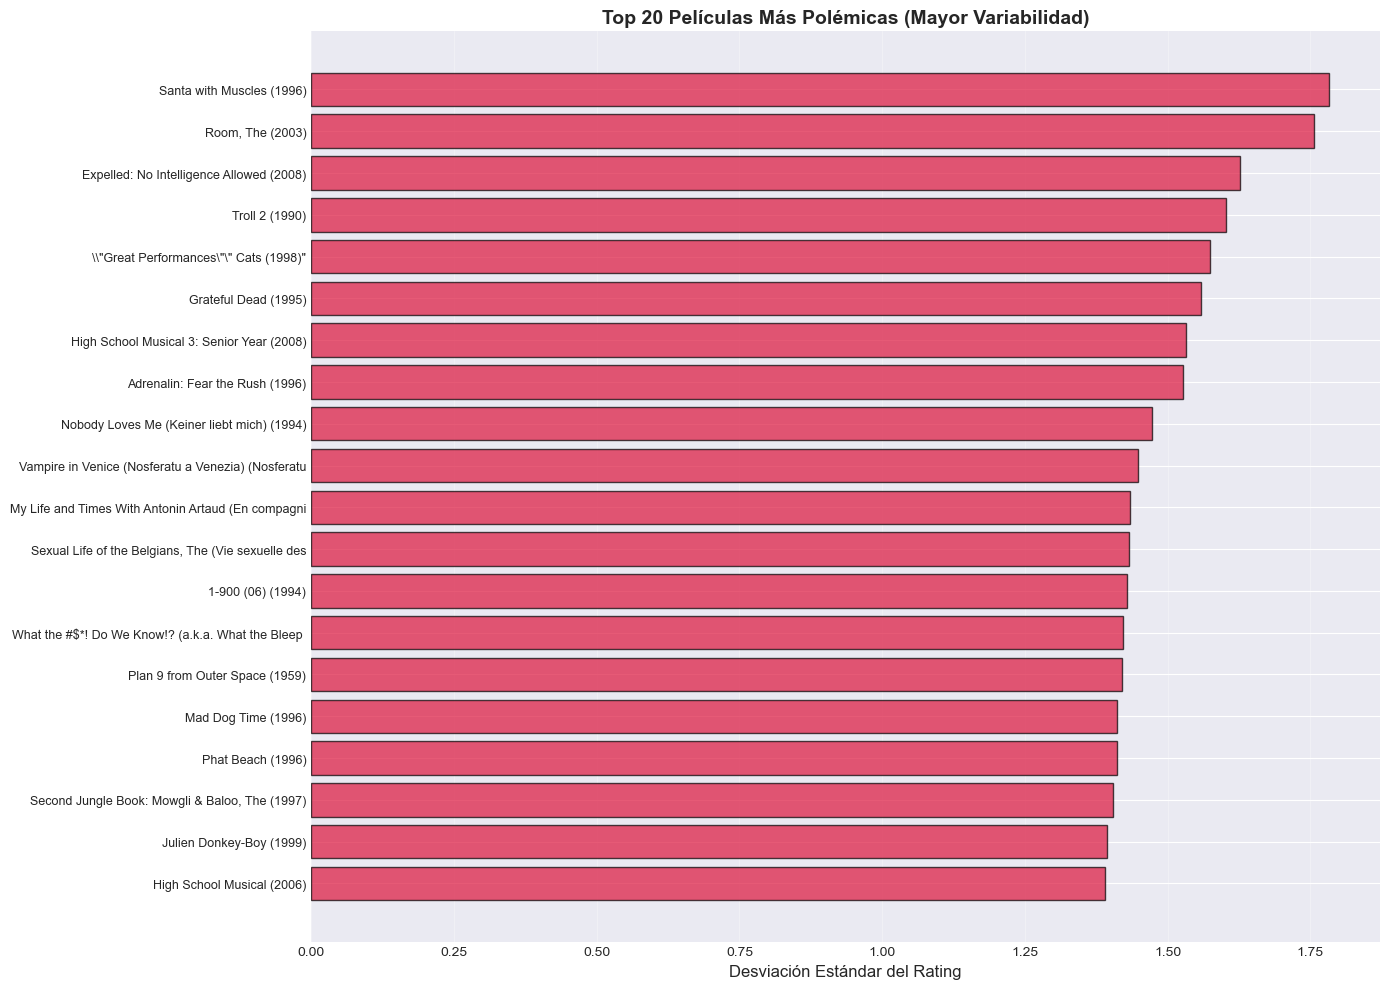


✓ Análisis de películas polémicas completado


In [30]:
# Películas más polémicas (mayor desviación estándar)
controversial_movies = movie_stats[movie_stats['num_ratings'] >= 100].copy()
controversial_movies = controversial_movies.merge(df_movies[['movieId', 'title', 'genres']], 
                                                   on='movieId')
controversial_movies = controversial_movies.sort_values('std_rating', ascending=False).head(20)

print("=" * 80)
print("TOP 20 PELÍCULAS MÁS POLÉMICAS (Mayor Variabilidad en Ratings)")
print("=" * 80)
for i, row in enumerate(controversial_movies.itertuples(), 1):
    print(f"{i:2d}. {row.title}")
    print(f"    Rating promedio: {row.avg_rating:.2f} | Desv. Est.: {row.std_rating:.2f} | "
          f"Ratings: {row.num_ratings}")
    print(f"    Géneros: {row.genres}")
    print()

# Visualización
fig, ax = plt.subplots(figsize=(14, 10))
y_pos = np.arange(len(controversial_movies))

# Crear barras con color según desviación estándar
bars = ax.barh(y_pos, controversial_movies['std_rating'], color='crimson', 
               edgecolor='black', alpha=0.7)

ax.set_yticks(y_pos)
ax.set_yticklabels([title[:50] for title in controversial_movies['title']], fontsize=9)
ax.set_xlabel('Desviación Estándar del Rating', fontsize=12)
ax.set_title('Top 20 Películas Más Polémicas (Mayor Variabilidad)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✓ Análisis de películas polémicas completado")

## 7. Conclusiones y Hallazgos Principales

In [31]:
print("=" * 80)
print("CONCLUSIONES Y HALLAZGOS PRINCIPALES DEL EDA")
print("=" * 80)

conclusions = """
📊 **ESTRUCTURA DEL DATASET**
   - El dataset MovieLens es extenso y bien estructurado con múltiples tablas relacionadas
   - Incluye información de películas, ratings, tags, genome tags y enlaces externos
   - Los datos están limpios con pocos valores nulos

📈 **ESTADÍSTICAS GENERALES**
   - Total de películas: {:,}
   - Total de usuarios: {:,}
   - Total de ratings: {:,}
   - Rating promedio general: {:.2f}
   - Promedio de ratings por usuario: {:.2f}
   - Promedio de ratings por película: {:.2f}

🎬 **DISTRIBUCIÓN DE PELÍCULAS**
   - Las películas abarcan múltiples décadas, con mayor concentración en años recientes
   - Rango de años: {:.0f} - {:.0f}
   - Géneros más comunes: Drama, Comedy, Thriller (géneros tradicionales dominan)

⭐ **PATRONES DE RATINGS**
   - Distribución sesgada hacia ratings positivos (>= 3.0)
   - Los usuarios tienden a calificar películas que les gustan
   - Existe variabilidad en los ratings, indicando diversidad de opiniones

👥 **COMPORTAMIENTO DE USUARIOS**
   - Alta variabilidad en la actividad de usuarios
   - Algunos usuarios son muy activos (power users) mientras otros califican pocas películas
   - La actividad varía según día de la semana

🏷️ **TAGS Y GENOME**
   - Tags únicos: {:,}
   - Genome tags: {:,} (taxonomía predefinida)
   - Los tags proporcionan información semántica rica sobre las películas
   - Correlaciones entre genome tags revelan relaciones conceptuales

🎯 **CALIDAD DEL DATASET**
   - Dataset ideal para sistemas de recomendación
   - Información rica para filtrado colaborativo y basado en contenido
   - Enlaces a IMDb y TMDb permiten enriquecimiento de datos
   - Temporal: permite análisis de evolución de preferencias

📝 **RECOMENDACIONES PARA MODELADO**
   - Considerar mínimo de ratings para evitar sesgos (películas con pocos ratings)
   - Explorar técnicas de matrix factorization dado el tamaño del dataset
   - Aprovechar genome tags para filtrado basado en contenido
   - Considerar cold-start problem para nuevas películas/usuarios
""".format(
    df_movies['movieId'].nunique(),
    df_ratings['userId'].nunique(),
    len(df_ratings),
    df_ratings['rating'].mean(),
    len(df_ratings) / df_ratings['userId'].nunique(),
    len(df_ratings) / df_ratings['movieId'].nunique(),
    df_movies['year'].min(),
    df_movies['year'].max(),
    df_tags['tag'].nunique(),
    len(df_genome_tags)
)

print(conclusions)
print("=" * 80)
print("✓ Análisis Exploratorio de Datos Completado")
print("=" * 80)

CONCLUSIONES Y HALLAZGOS PRINCIPALES DEL EDA

CONCLUSIONES Y HALLAZGOS PRINCIPALES DEL EDA

📊 **ESTRUCTURA DEL DATASET**
   - El dataset MovieLens es extenso y bien estructurado con múltiples tablas relacionadas
   - Incluye información de películas, ratings, tags, genome tags y enlaces externos
   - Los datos están limpios con pocos valores nulos

📈 **ESTADÍSTICAS GENERALES**
   - Total de películas: 27,278
   - Total de usuarios: 138,493
   - Total de ratings: 20,000,263
   - Rating promedio general: 3.53
   - Promedio de ratings por usuario: 144.41
   - Promedio de ratings por película: 747.84

🎬 **DISTRIBUCIÓN DE PELÍCULAS**
   - Las películas abarcan múltiples décadas, con mayor concentración en años recientes
   - Rango de años: 1891 - 2015
   - Géneros más comunes: Drama, Comedy, Thriller (géneros tradicionales dominan)

⭐ **PATRONES DE RATINGS**
   - Distribución sesgada hacia ratings positivos (>= 3.0)
   - Los usuarios tienden a calificar películas que les gustan
   - Existe 